In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
from numpy.fft import fft2, ifft2

digital mammography image

In [20]:
dataset_path = "/content/drive/MyDrive/AssignmentCV/DigitalMammography/jpeg/1.3.6.1.4.1.9590.100.1.2.101011223512108697114157057734091580668"
image_files = os.listdir(dataset_path)
print(image_files)

['1-118.jpg', '2-096.jpg']


In [8]:
print("Total images found:", len(image_files))

Total images found: 2


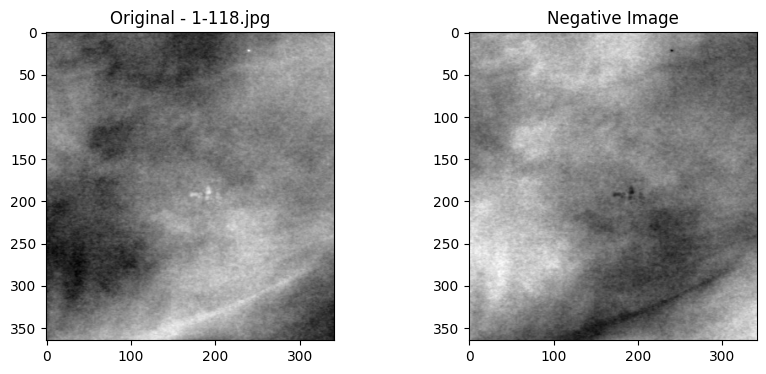

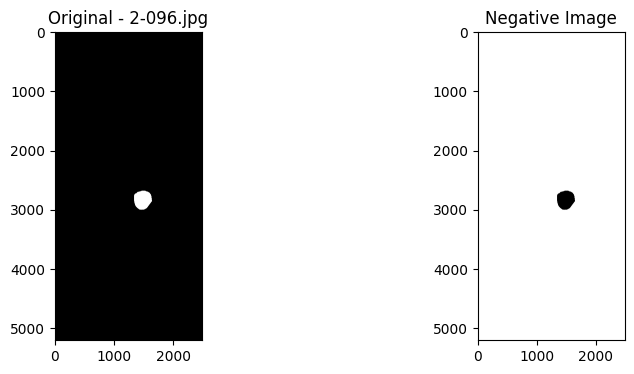

In [19]:
for file in image_files[:5]:
    img_path = os.path.join(dataset_path, file)
    image = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)

    if len(image.shape) == 3:
        # kalau ternyata ada channel RGB, konversi ke grayscale
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Negative transform
    negative_img = 255 - image

    # Tampilkan
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.title(f"Original - {file}")
    plt.imshow(image, cmap='gray')

    plt.subplot(1,2,2)
    plt.title("Negative Image")
    plt.imshow(negative_img, cmap='gray')
    plt.show()

Salt and pepper noise image

In [ ]:
dataset_path = "/content/drive/MyDrive/AssignmentCV/SaltNoisy_folder"
image_files = os.listdir(dataset_path)
print(image_files)

['noisy_27460702433_043eb5037e_c.jpg', 'noisy_2956357993_eb3a323205_c.jpg', 'noisy_28567173313_2af2bf4d34_c.jpg', 'noisy_28673681706_656488f421_c.jpg', 'noisy_23962750571_78d6441e12_c.jpg', 'noisy_27837388415_5d9b748859_c.jpg', 'noisy_24522074117_e50a35ef5b_c.jpg', 'noisy_23300848273_1f70afa08d_c.jpg', 'noisy_2484752891_160e96522a_c.jpg', 'noisy_28884761306_5e42be77c0_c.jpg', 'noisy_2308151492_b1c1167f17_c.jpg', 'noisy_24460499456_1f3e466a0f_c.jpg', 'noisy_24175087428_2543e9c11a_c.jpg', 'noisy_28173055910_61502a0179_c.jpg', 'noisy_2296844163_0f02ea244c_c.jpg', 'noisy_2423327630_53ffee85a8_c.jpg', 'noisy_28916341450_fe439fc639_c.jpg', 'noisy_2692263199_70056445d7_c.jpg', 'noisy_2654419663_a3f0e11181_c.jpg', 'noisy_27761632611_7330aca752_c.jpg', 'noisy_236641496_40cf8ed020_c.jpg', 'noisy_2377410840_6a60ce8d0e_c.jpg', 'noisy_2312614472_572e87383f_c.jpg', 'noisy_24809239941_f9b94f8794_c.jpg', 'noisy_2285257066_188ee5a60d_c.jpg', 'noisy_2469840099_11e02436ec_c.jpg', 'noisy_3039234748_141459

In [ ]:
print("Total images found:", len(image_files))

Total images found: 300


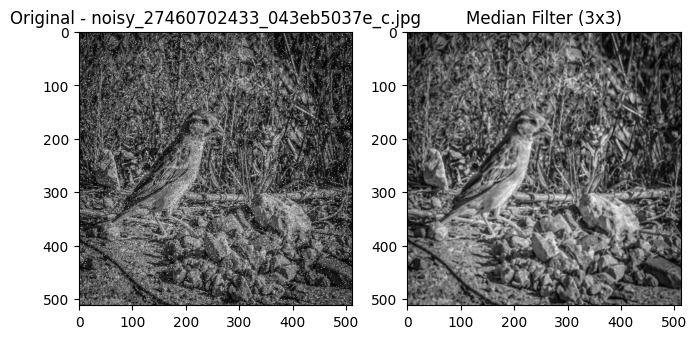

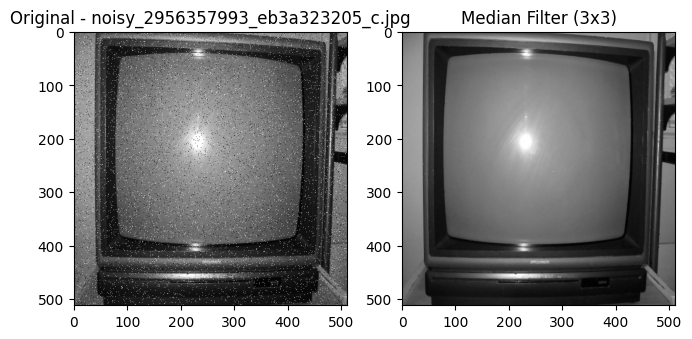

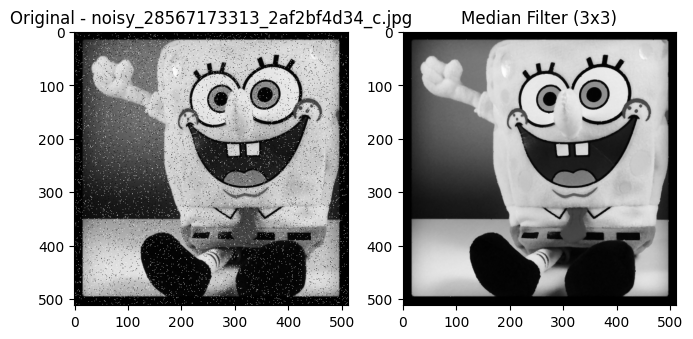

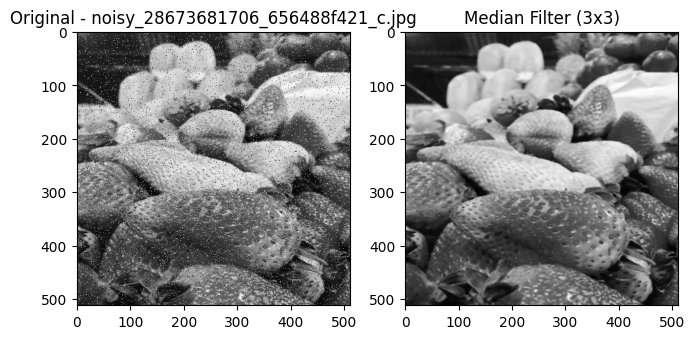

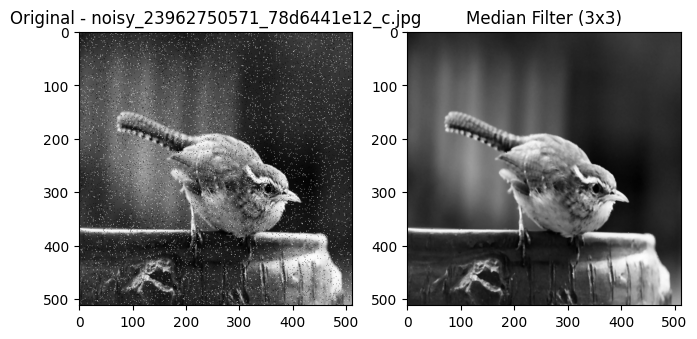

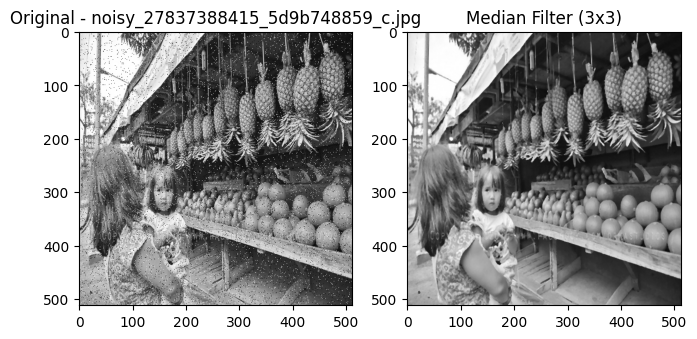

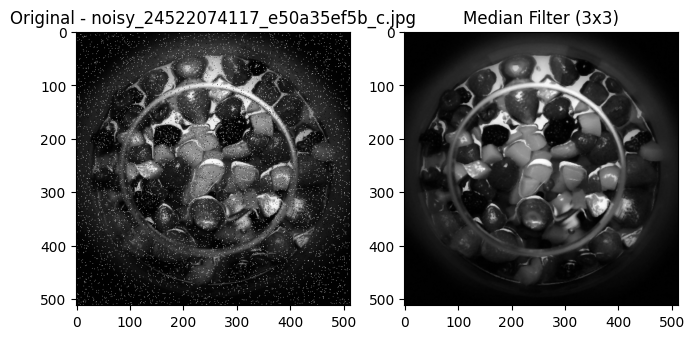

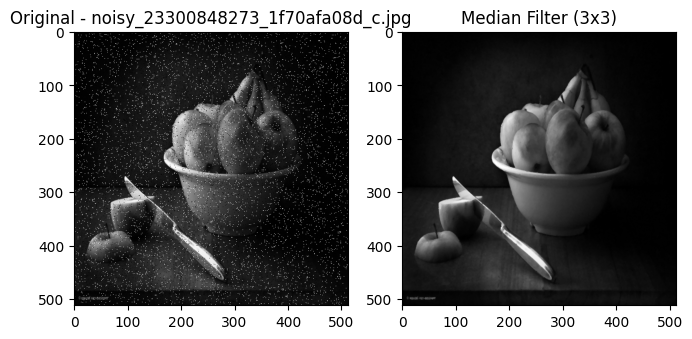

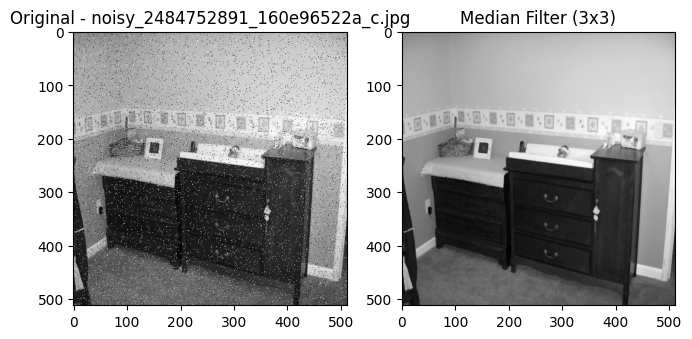

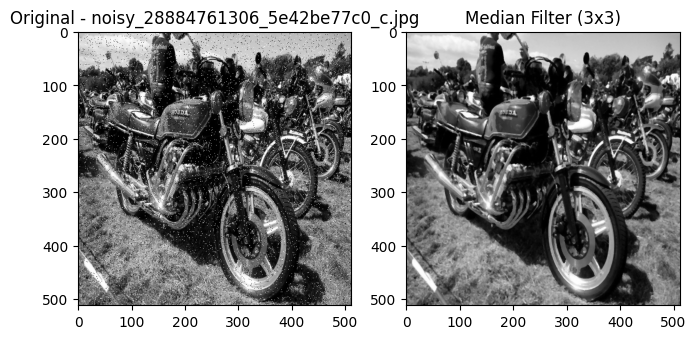

In [ ]:
# Batasi contoh biar cepat
for i, file in enumerate(image_files[:10]):
    img_path = os.path.join(dataset_path, file)
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Grayscale

    if image is None:
        print(f"Gagal membaca {file}")
        continue

    # Terapkan median filter
    median_filtered = cv2.medianBlur(image, 3)   # kernel size 3x3

    # Tampilkan perbandingan
    plt.figure(figsize=(12,6))
    plt.subplot(1,3,1)
    plt.title(f"Original - {file}")
    plt.imshow(image, cmap='gray')

    plt.subplot(1,3,2)
    plt.title("Median Filter (3x3)")
    plt.imshow(median_filtered, cmap='gray')

    plt.show()

Low Light Image

In [ ]:
dataset_path = "/content/drive/MyDrive/AssignmentCV/Car"
image_files = os.listdir(dataset_path)
print(image_files)

['2015_02425.jpg', '2015_02415.jpg', '2015_02417.jpg', '2015_02420.jpg', '2015_02422.jpg', '2015_02414.jpg', '2015_02411.jpg', '2015_02421.jpg', '2015_02426.jpg', '2015_02413.jpg', '2015_02406.jpg', '2015_02423.jpg', '2015_02412.jpg', '2015_02419.jpg', '2015_02416.png', '2015_02407.jpg', '2015_02409.jpg', '2015_02410.png', '2015_02424.jpg', '2015_02418.jpg', '2015_02408.jpg', '2015_02460.jpg', '2015_02497.jpg', '2015_02539.jpg', '2015_02447.jpg', '2015_02482.jpg', '2015_02554.jpg', '2015_02513.jpg', '2015_02566.jpg', '2015_02430.jpg', '2015_02431.jpg', '2015_02571.jpg', '2015_02563.jpg', '2015_02543.jpg', '2015_02478.jpg', '2015_02432.jpg', '2015_02443.jpg', '2015_02496.jpg', '2015_02501.jpg', '2015_02495.jpg', '2015_02534.jpg', '2015_02517.jpg', '2015_02550.jpg', '2015_02456.jpg', '2015_02508.jpg', '2015_02521.jpg', '2015_02477.jpg', '2015_02427.jpg', '2015_02461.jpg', '2015_02536.jpg', '2015_02488.jpg', '2015_02459.jpg', '2015_02514.jpg', '2015_02504.jpg', '2015_02507.jpg', '2015_025

In [ ]:
print("Total images found:", len(image_files))

Total images found: 638


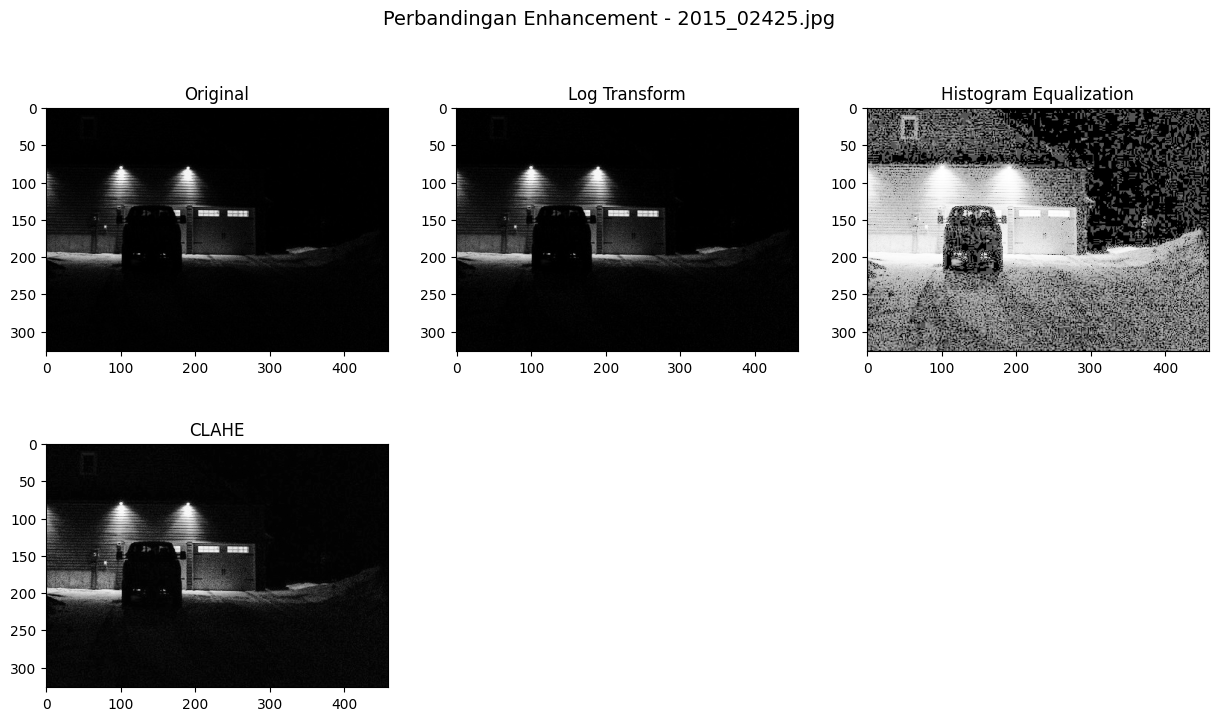

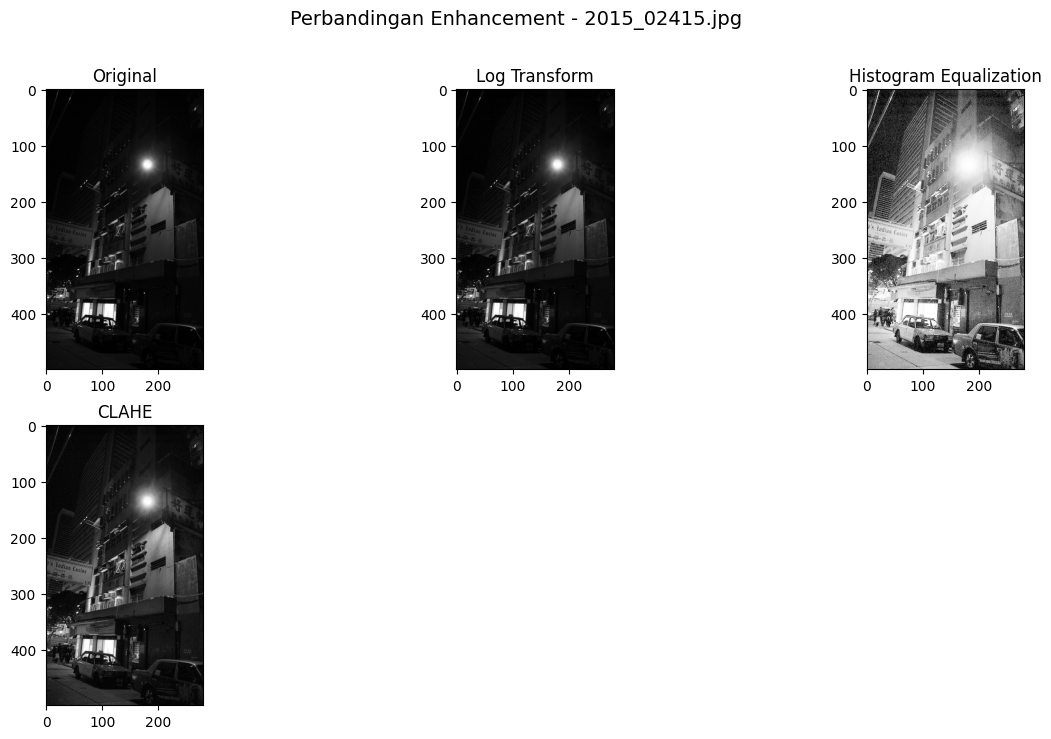

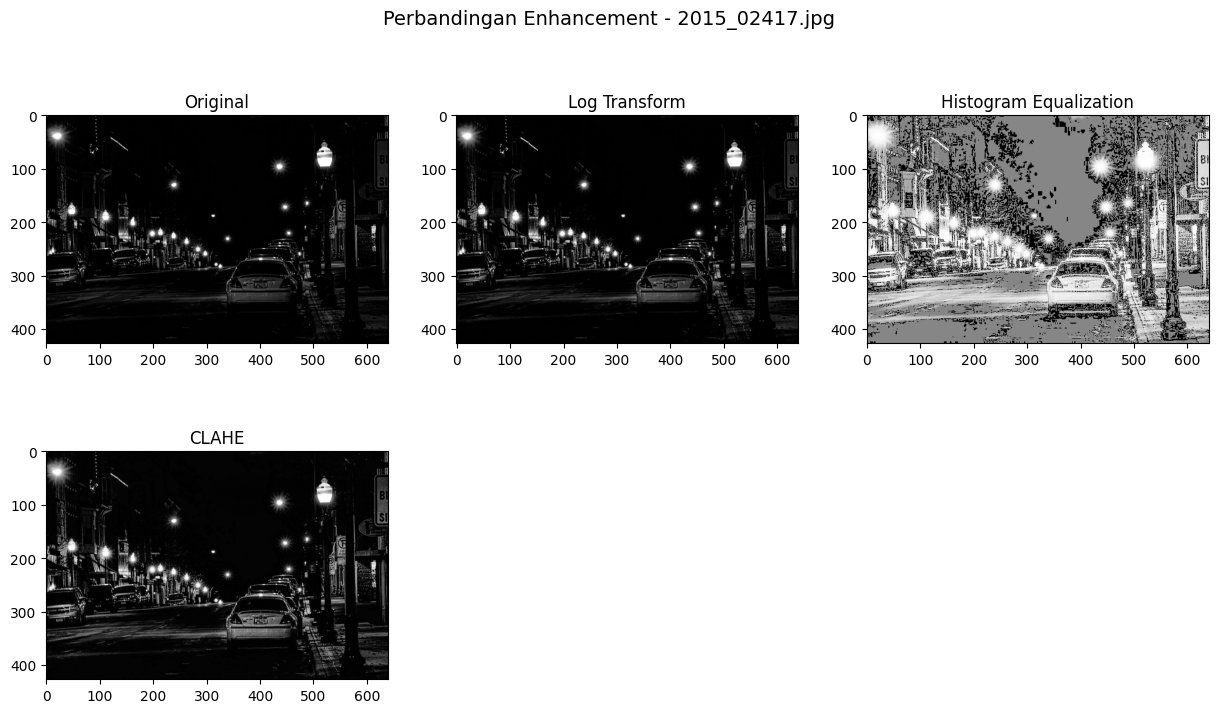

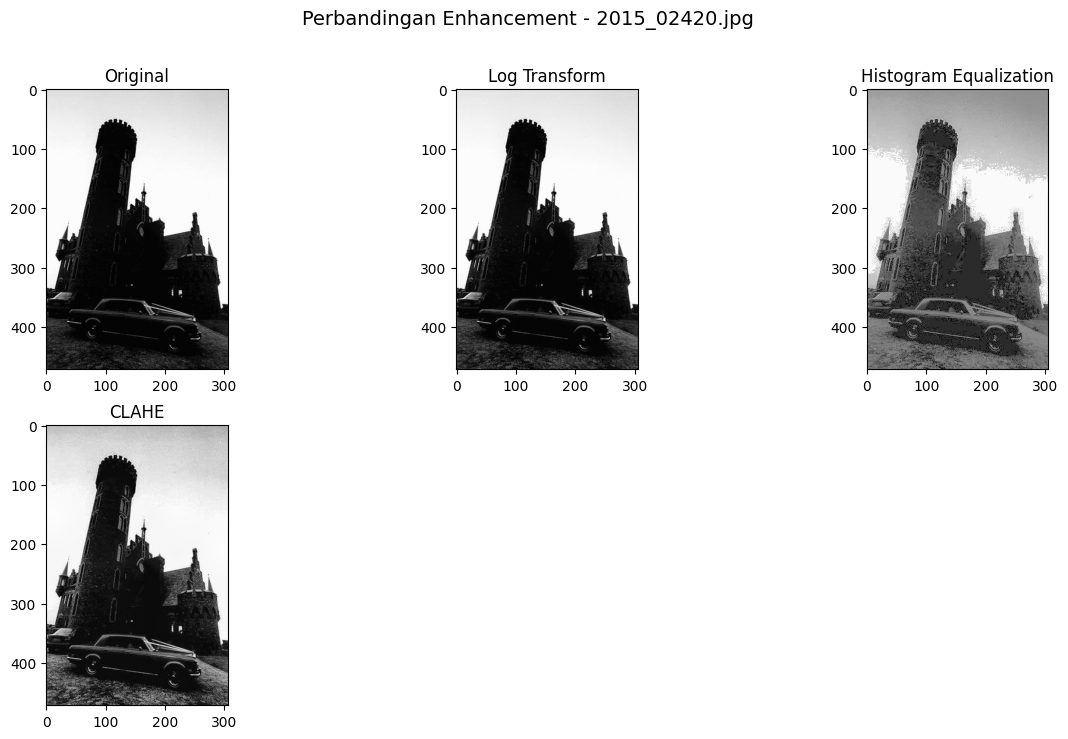

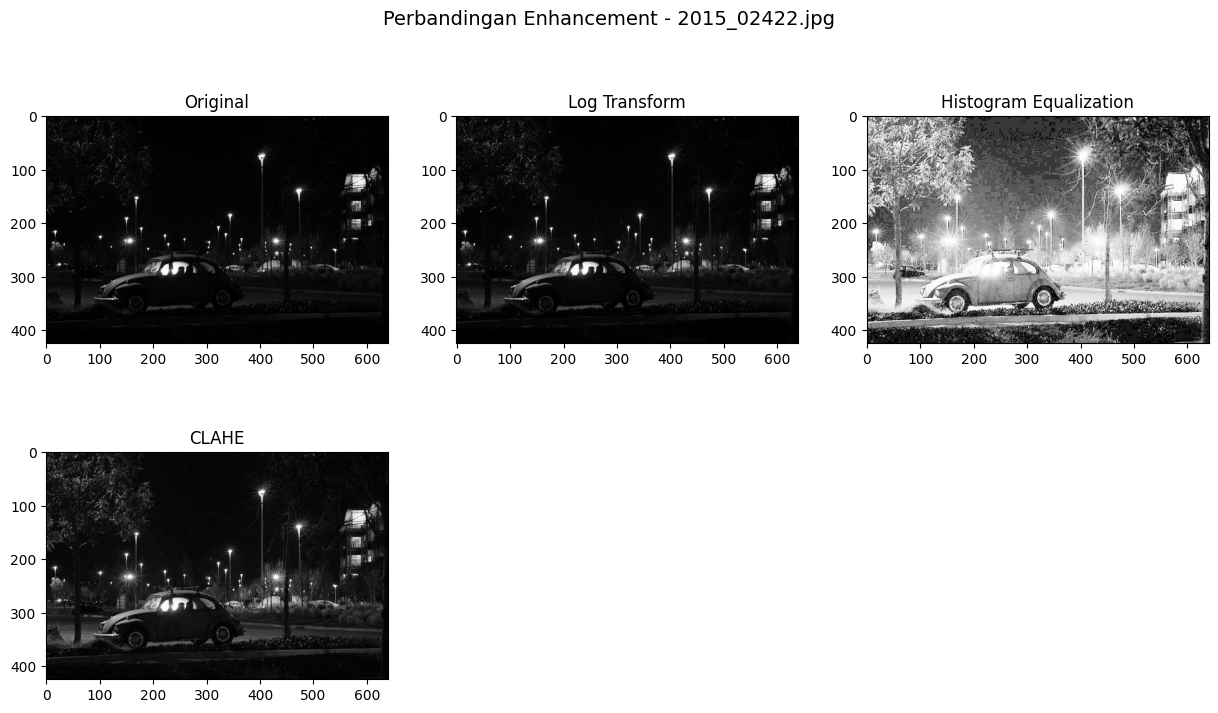

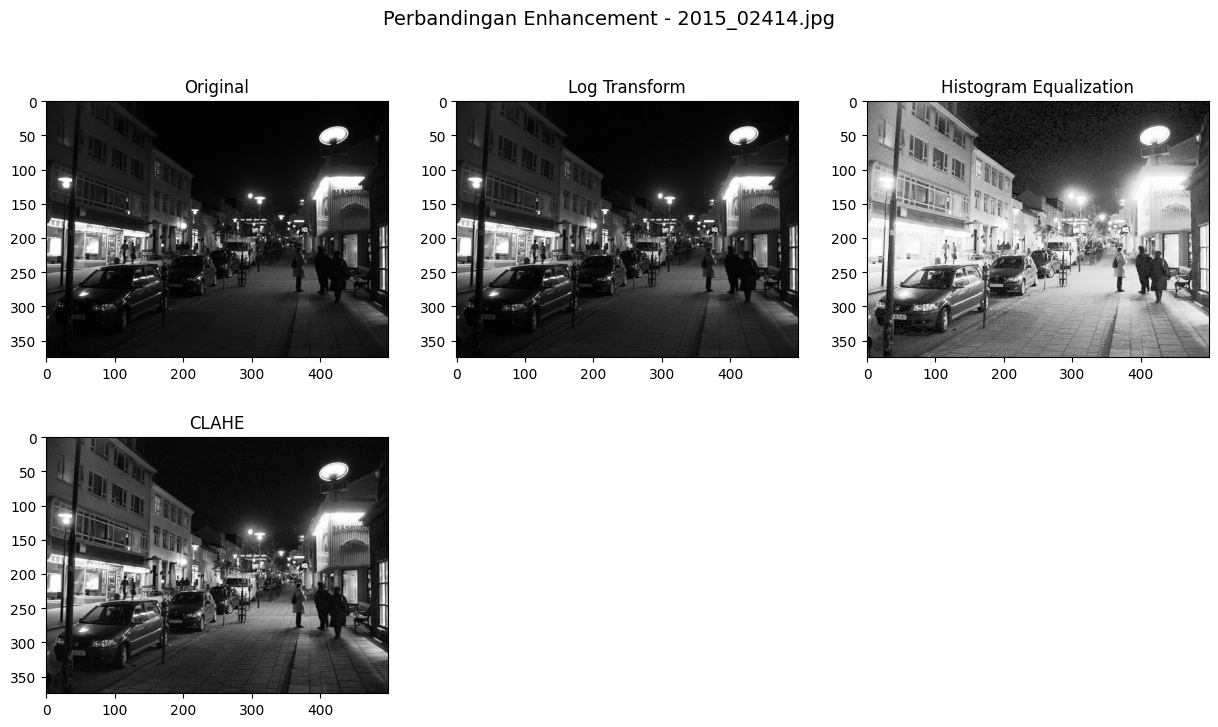

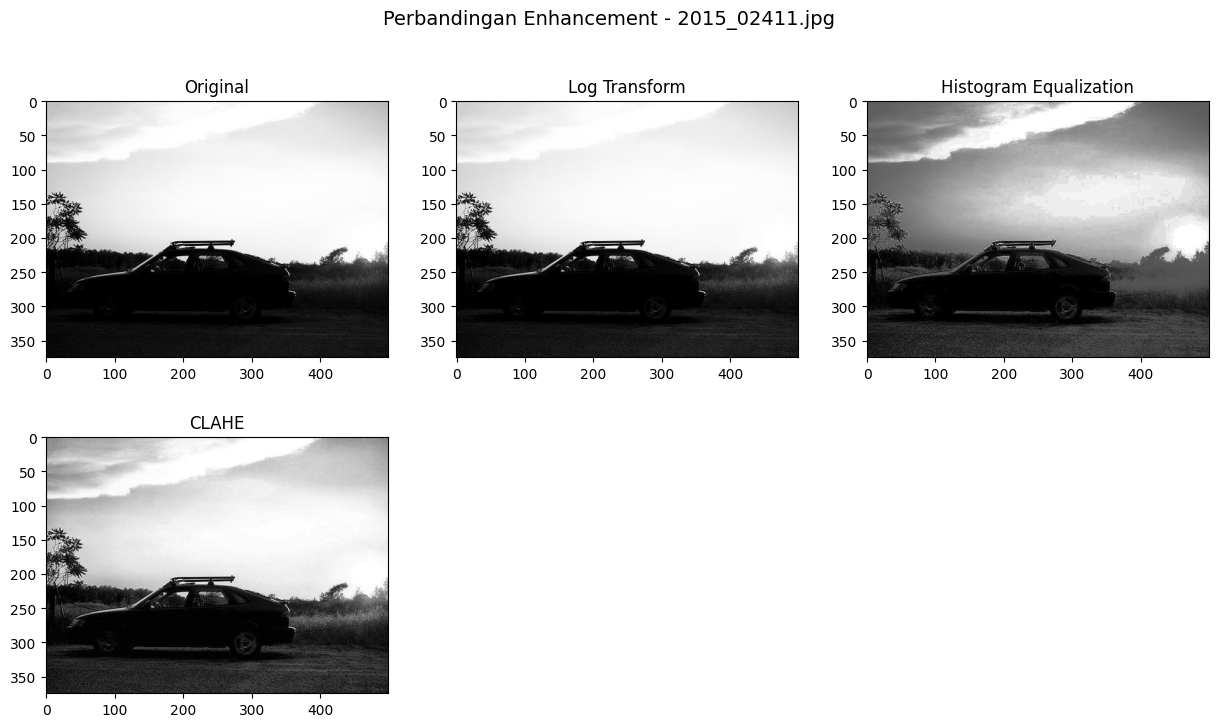

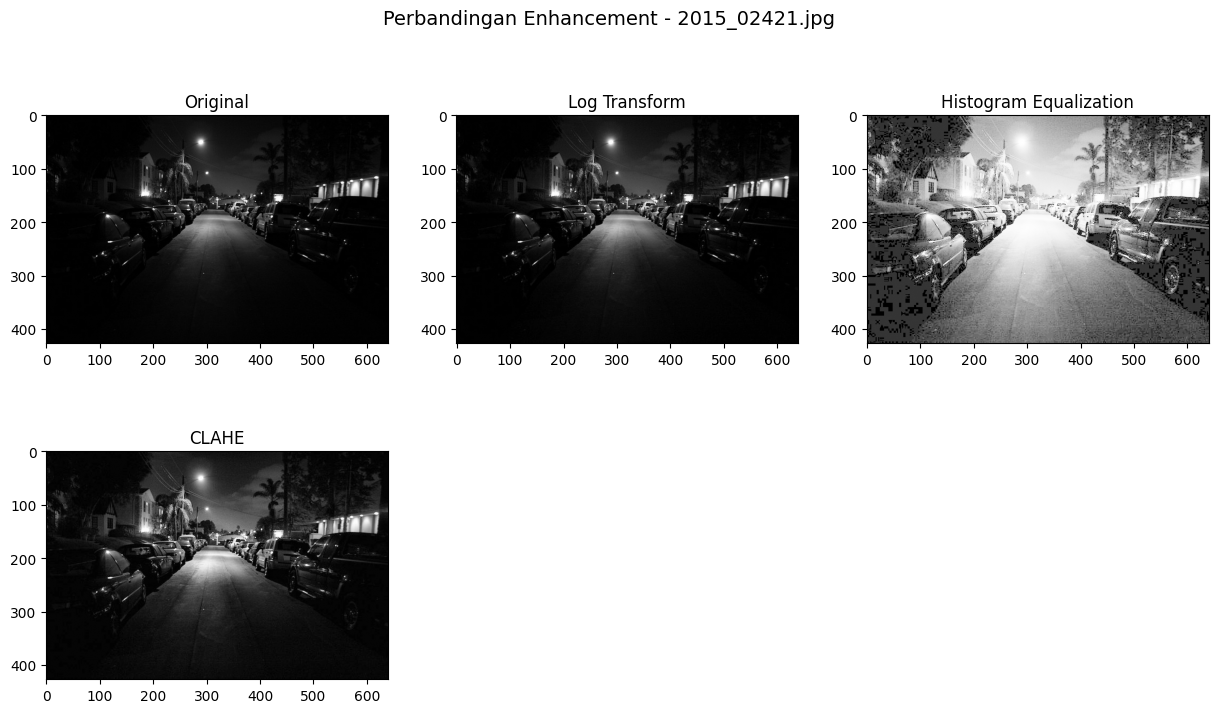

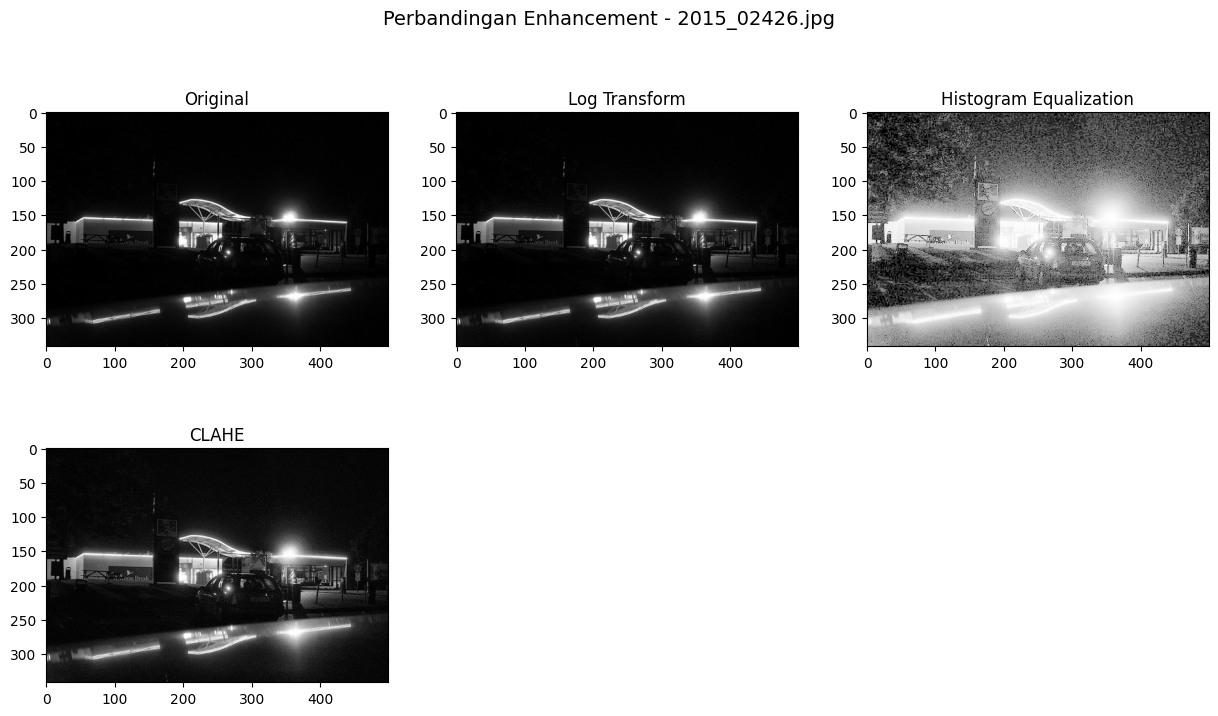

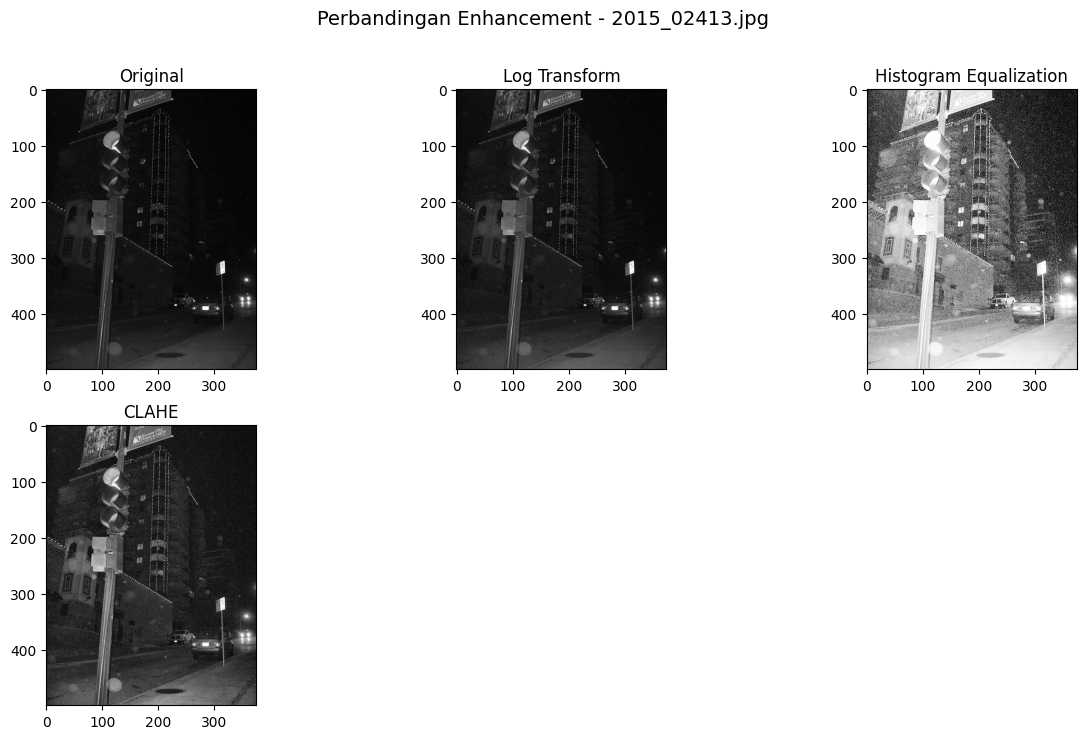

In [ ]:
# Batasi hanya tampilkan 10 contoh
for i, file in enumerate(image_files[:10]):
    img_path = os.path.join(dataset_path, file)
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # grayscale

    if image is None:
        print(f"Gagal membaca {file}")
        continue

    # ---------- 1. Log Transform ----------
    image_normalized = image / 255.0
    c = 0.3
    log_transformed = c * np.log(1 + image_normalized)
    log_transformed = cv2.normalize(log_transformed, None, 0, 255, cv2.NORM_MINMAX)
    log_transformed = np.uint8(log_transformed)

    # ---------- 2. Histogram Equalization ----------
    hist_eq = cv2.equalizeHist(image)

    # ---------- 3. CLAHE ----------
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    clahe_img = clahe.apply(image)

    # ---------- Tampilkan hasil ----------
    plt.figure(figsize=(15,8))
    plt.suptitle(f"Perbandingan Enhancement - {file}", fontsize=14)

    plt.subplot(2,3,1)
    plt.title("Original")
    plt.imshow(image, cmap='gray')

    plt.subplot(2,3,2)
    plt.title("Log Transform")
    plt.imshow(log_transformed, cmap='gray')

    plt.subplot(2,3,3)
    plt.title("Histogram Equalization")
    plt.imshow(hist_eq, cmap='gray')

    plt.subplot(2,3,4)
    plt.title("CLAHE")
    plt.imshow(clahe_img, cmap='gray')

    plt.show()